In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
shoes = pd.read_csv('MEN_SHOES.csv')

In [ ]:
shoes.dtypes

Brand_Name          object
How_Many_Sold       object
Current_Price       object
Product_details     object
RATING             float64
dtype: object

In [ ]:
shoes.isnull().sum(axis=0)

Brand_Name           0
How_Many_Sold        0
Current_Price      798
Product_details      0
RATING               0
dtype: int64

In [ ]:
shoes['Current_Price'] = shoes['Current_Price'].str.replace('₹', '').str.replace(',', '').astype(float)
shoes['How_Many_Sold'] = shoes['How_Many_Sold'].str.replace(',', '').astype(int)

In [ ]:
shoes.dtypes

Brand_Name          object
How_Many_Sold        int64
Current_Price      float64
Product_details     object
RATING             float64
dtype: object

In [ ]:
q1 = shoes['Current_Price'].quantile(0.25)
q3 = shoes['Current_Price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = shoes[(shoes['Current_Price'] < lower_bound) | (shoes['Current_Price'] > upper_bound)]

outliers_count = outliers.shape[0]

if outliers_count == 0:
    print("No hay outliers en la columna 'Current_Price'.")
else:
    print(f"Se han identificado {outliers_count} outliers en la columna 'Current_Price'.")


Se han identificado 798 outliers en la columna 'Current_Price'.


In [ ]:
q1 = shoes['Current_Price'].quantile(0.25)
q3 = shoes['Current_Price'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = shoes[(shoes['Current_Price'] < lower_bound) | (shoes['Current_Price'] > upper_bound)]

if not outliers.empty:
    print("Outliers en la columna 'Current_Price':")
    outliers_unique = outliers.drop_duplicates(subset=['Brand_Name', 'Current_Price'])
    for index, row in outliers_unique.iterrows():
        print(f"Marca: {row['Brand_Name']}, Precio: {row['Current_Price']}")
    print(f"Total de outliers únicos encontrados: {outliers_unique.shape[0]}")
else:
    print("No hay outliers en la columna 'Current_Price'.")


Outliers en la columna 'Current_Price':
Marca: Adidas, Precio: 2159.0
Marca: Adidas, Precio: 2008.0
Total de outliers únicos encontrados: 2


In [ ]:
def marcas_sin_precio(dataframe):
    marcas_faltantes = dataframe[dataframe['Current_Price'].isnull()]['Brand_Name'].value_counts().to_dict()
    return marcas_faltantes

marcas_faltantes = marcas_sin_precio(shoes)

if marcas_faltantes:
    print("Las siguientes marcas tienen valores nulos en la columna 'Current_Price")
    for marca, cantidad_nulos in marcas_faltantes.items():
        print(f"Marca: {marca}, Valores nulos: {cantidad_nulos}")
else:
    print("No hay marcas con valores nulos en la columna 'Current_Price'.")


Las siguientes marcas tienen valores nulos en la columna 'Current_Price
Marca: Puma, Valores nulos: 399
Marca: Sparx, Valores nulos: 399


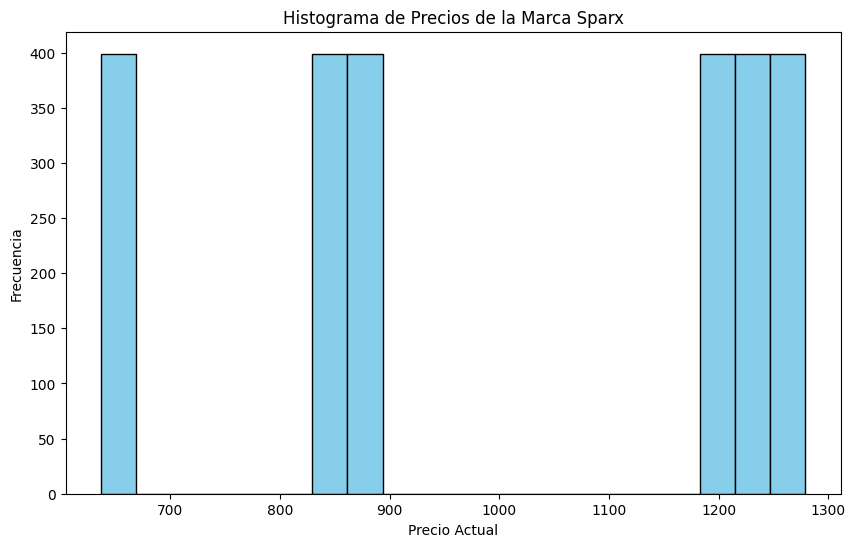

In [ ]:
sparx_data = shoes[shoes['Brand_Name'] == 'Sparx']

plt.figure(figsize=(10, 6))
plt.hist(sparx_data['Current_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Precios de la Marca Sparx')
plt.xlabel('Precio Actual')
plt.ylabel('Frecuencia')
plt.show()


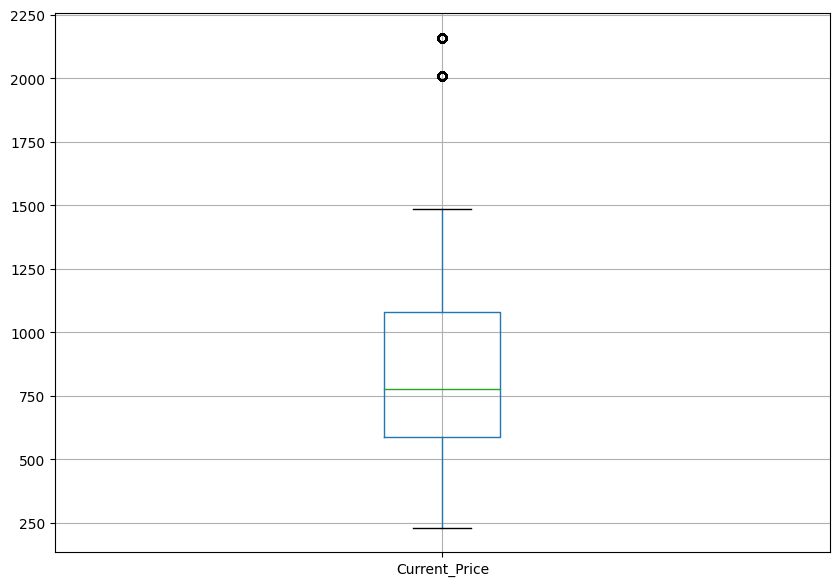

In [ ]:
plt.figure(figsize=(10,  7))
shoes.boxplot(column=['Current_Price'])
plt.show()

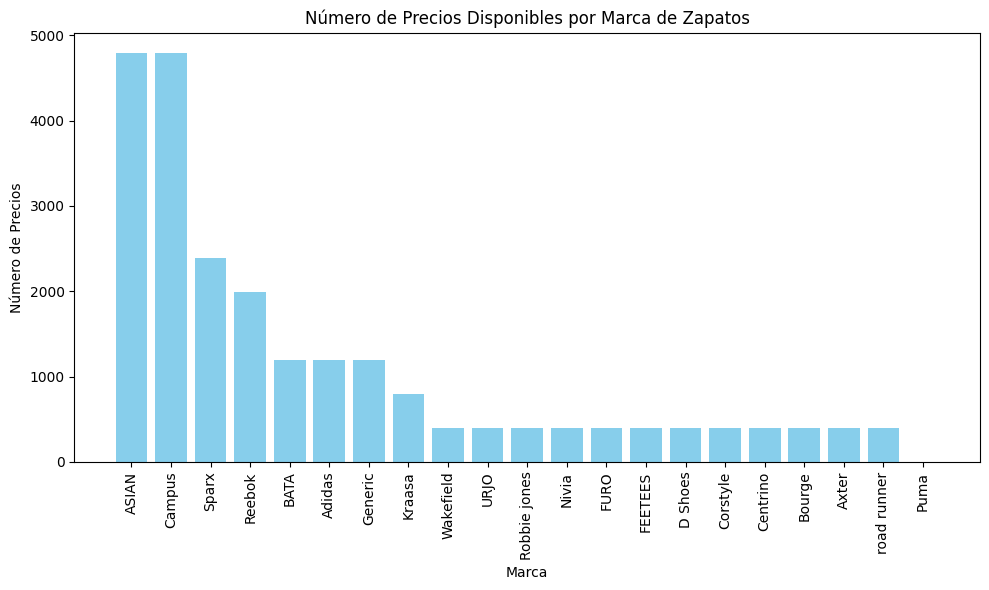

In [ ]:
marca_precios_count = shoes.groupby('Brand_Name')['Current_Price'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(marca_precios_count.index, marca_precios_count.values, color='skyblue')
plt.xlabel('Marca')
plt.ylabel('Número de Precios')
plt.title('Número de Precios Disponibles por Marca de Zapatos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
shoes2 = shoes.drop(shoes[shoes['Brand_Name'] == 'Puma'].index)

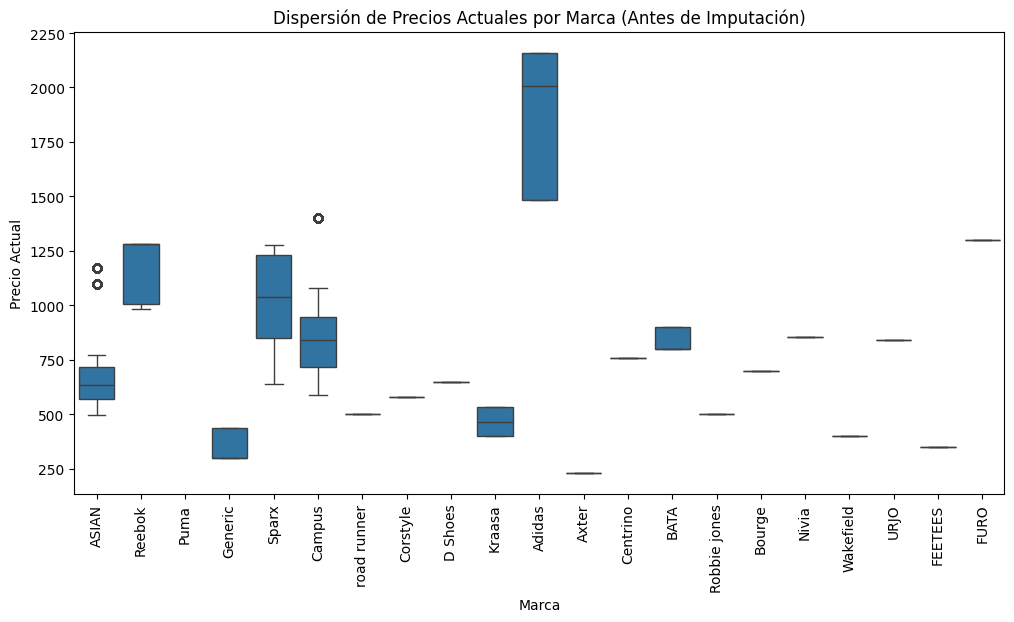

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand_Name', y='Current_Price', data=shoes)
plt.title('Dispersión de Precios Actuales por Marca (Antes de Imputación)')
plt.xlabel('Marca')
plt.ylabel('Precio Actual')
plt.xticks(rotation=90)
plt.show()

In [ ]:
overall_median = shoes['Current_Price'].median()

def impute_with_median(group):
    if group.notnull().any():
        return group.fillna(group.median())
    else:
        return group.fillna(overall_median)

shoes['Current_Price'] = shoes.groupby('Brand_Name', group_keys=False)['Current_Price'].apply(impute_with_median)


In [ ]:
shoes.isnull().sum(axis=0)

Brand_Name         0
How_Many_Sold      0
Current_Price      0
Product_details    0
RATING             0
dtype: int64

Total de precios disponibles para todas las marcas: 23940


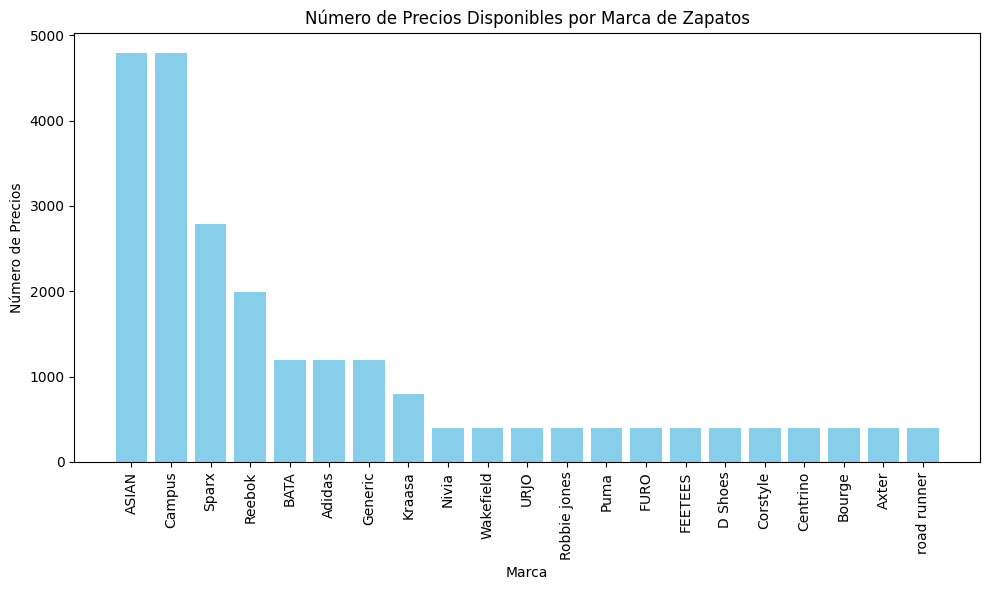

In [ ]:
marca_precios_count = shoes.groupby('Brand_Name')['Current_Price'].count().sort_values(ascending=False)
total_precios = marca_precios_count.sum()
print("Total de precios disponibles para todas las marcas:", total_precios)

plt.figure(figsize=(10, 6))
plt.bar(marca_precios_count.index, marca_precios_count.values, color='skyblue')
plt.xlabel('Marca')
plt.ylabel('Número de Precios')
plt.title('Número de Precios Disponibles por Marca de Zapatos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
popular = shoes.drop_duplicates()
popular.sort_values(by=['How_Many_Sold'], ascending = False).head(10)

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
6,ASIAN,72611,498.0,Men's Wonder-13 Sports Running Shoes,4.0
28,Sparx,38839,637.0,Men's Sd0323g Sneakers,4.2
46,Bourge,18747,699.0,Men's Loire-z1 Running Shoes,4.0
2,ASIAN,16662,588.0,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
20,ASIAN,7712,524.0,"Men's Century-12 Sports Running Shoes Walking,...",3.8
19,Kraasa,6159,399.0,Men SocksFit Walking and Running Shoes,3.6
44,Campus,5690,901.0,Mens Stonic Running Shoes,4.0
31,Adidas,4992,1485.0,Men's Yking 2.0 Running Shoes,4.2
21,Campus,4583,1399.0,Mens First Running Shoe,4.0
36,Sparx,3532,1231.0,Men's Running Shoes,4.4


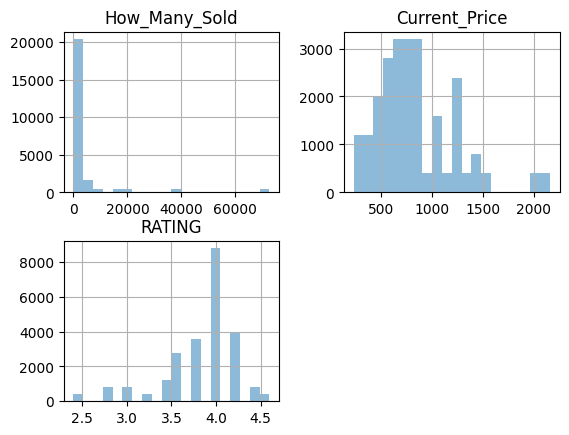

In [ ]:
shoes.hist(bins=20, alpha=0.5)
plt.show()

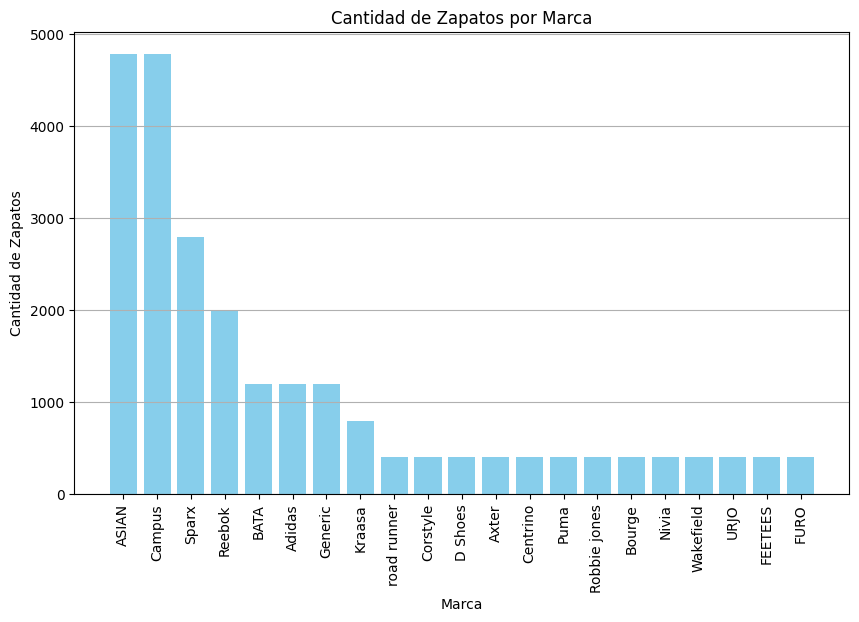

In [ ]:
marca_counts = shoes['Brand_Name'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(marca_counts.index, marca_counts.values, color='skyblue')
plt.title('Cantidad de Zapatos por Marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Zapatos')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()